## Step 1: Reading and understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/mamta/Downloads/Machine learning Material - upgrad/Random Forest/heart_v2.csv')
data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
data.shape

(270, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


## Step 2: Data Visualization 

In [5]:
data.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


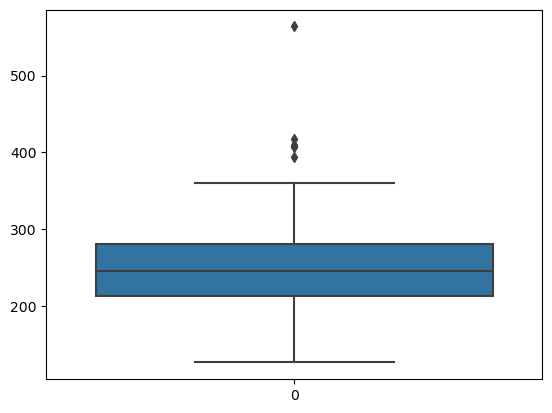

In [6]:
sns.boxplot(data['cholestrol'])
plt.show()

In [7]:
data[data['cholestrol'] > 407]

,age,sex,BP,cholestrol,heart disease
1,67,0,115,564,0
52,65,0,140,417,0
181,56,0,134,409,1


We will not treat these extreme values as outlier, as they might represnt important information here. 

### Finding correlations 

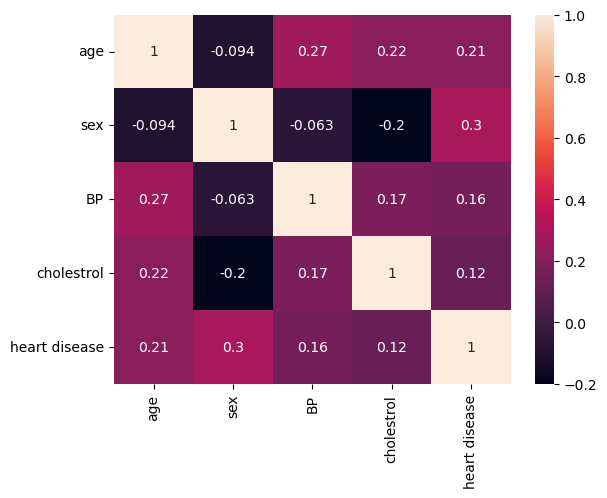

In [8]:
sns.heatmap(data.corr(), annot = True)
plt.show()

## Step 3: Model building 

In [9]:
# putting features variables to X
X = data.drop('heart disease', axis = 1)

# putting response variable to y
y = data['heart disease']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((216, 4), (54, 4))

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [18]:
from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [19]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [22]:
sample_tree = random_forest.estimators_[0]

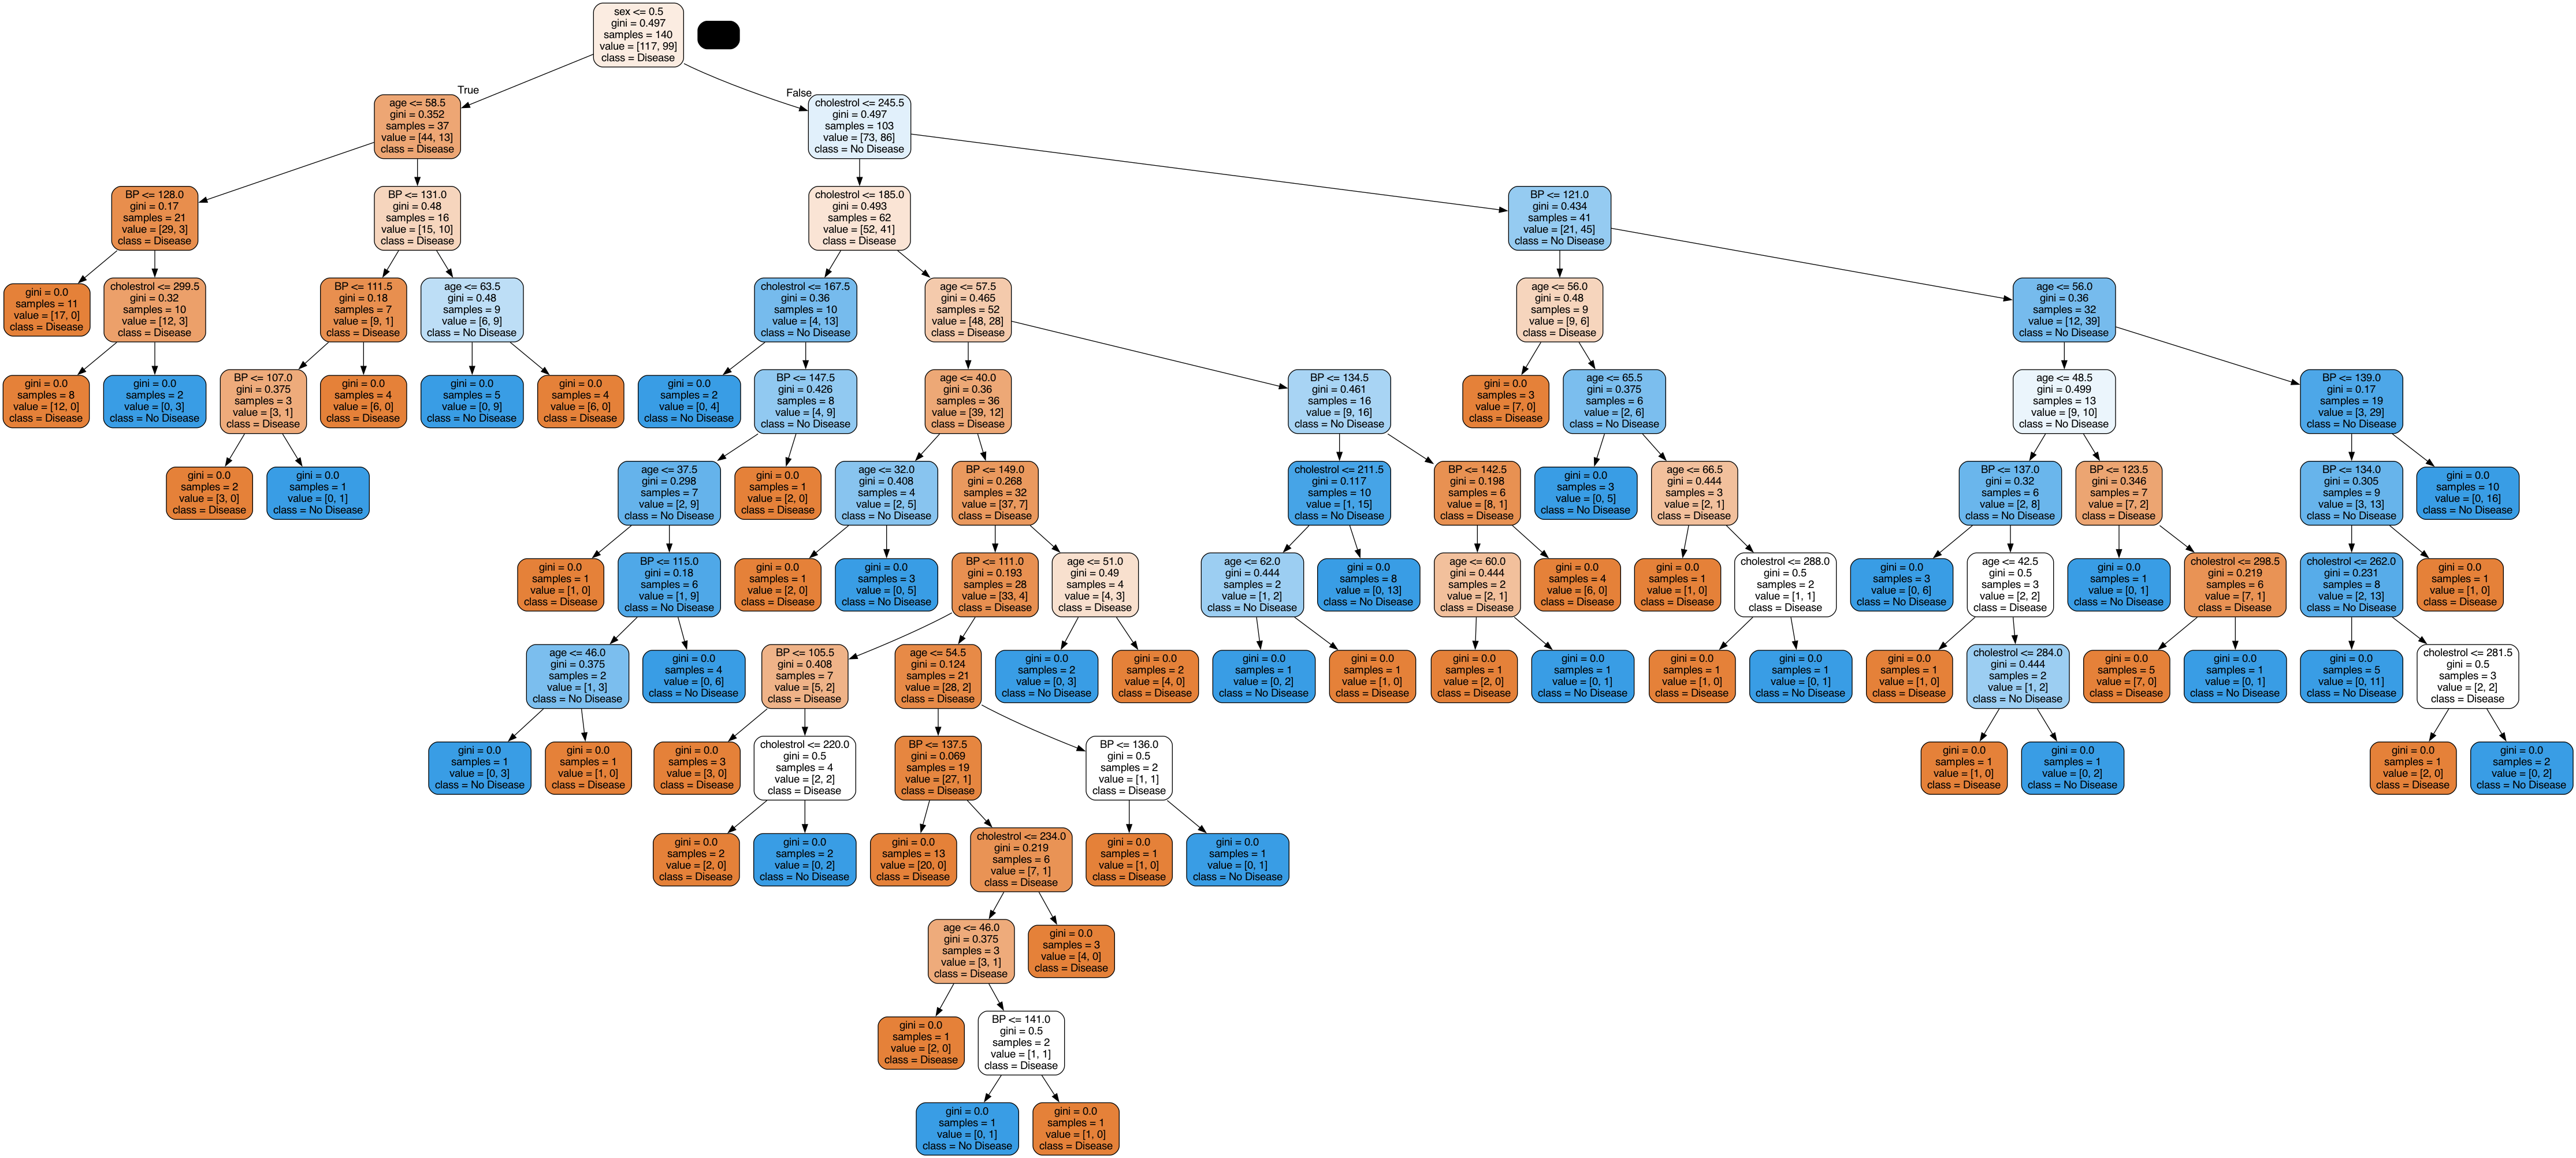

In [23]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

### Evaluating model performance 

In [24]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
print("Train performance")
print(accuracy_score(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

train performance
1.0
[[117   0]
 [  0  99]]


In [27]:
print("Test performance")
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

test performance
0.6111111111111112
[[21 12]
 [ 9 12]]


## Hyper parameter tuning

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [93]:
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 15, 20, 50, 100, 200]
}

In [94]:
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")

In [95]:
%%time
grid_search.fit(X, y)

Fitting 4 folds for each of 450 candidates, totalling 1800 fits
CPU times: user 881 ms, sys: 190 ms, total: 1.07 s
Wall time: 33 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 15, 20, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [96]:
best_rf = grid_search.best_estimator_
best_rf

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=20, n_jobs=-1, random_state=42)

In [97]:
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [98]:
print("train performance")
print(accuracy_score(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

train performance
0.8009259259259259
[[99 18]
 [25 74]]


In [99]:
print("test performance")
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

test performance
0.8148148148148148
[[31  2]
 [ 8 13]]


In [100]:
sample_tree = best_rf.estimators_[5]

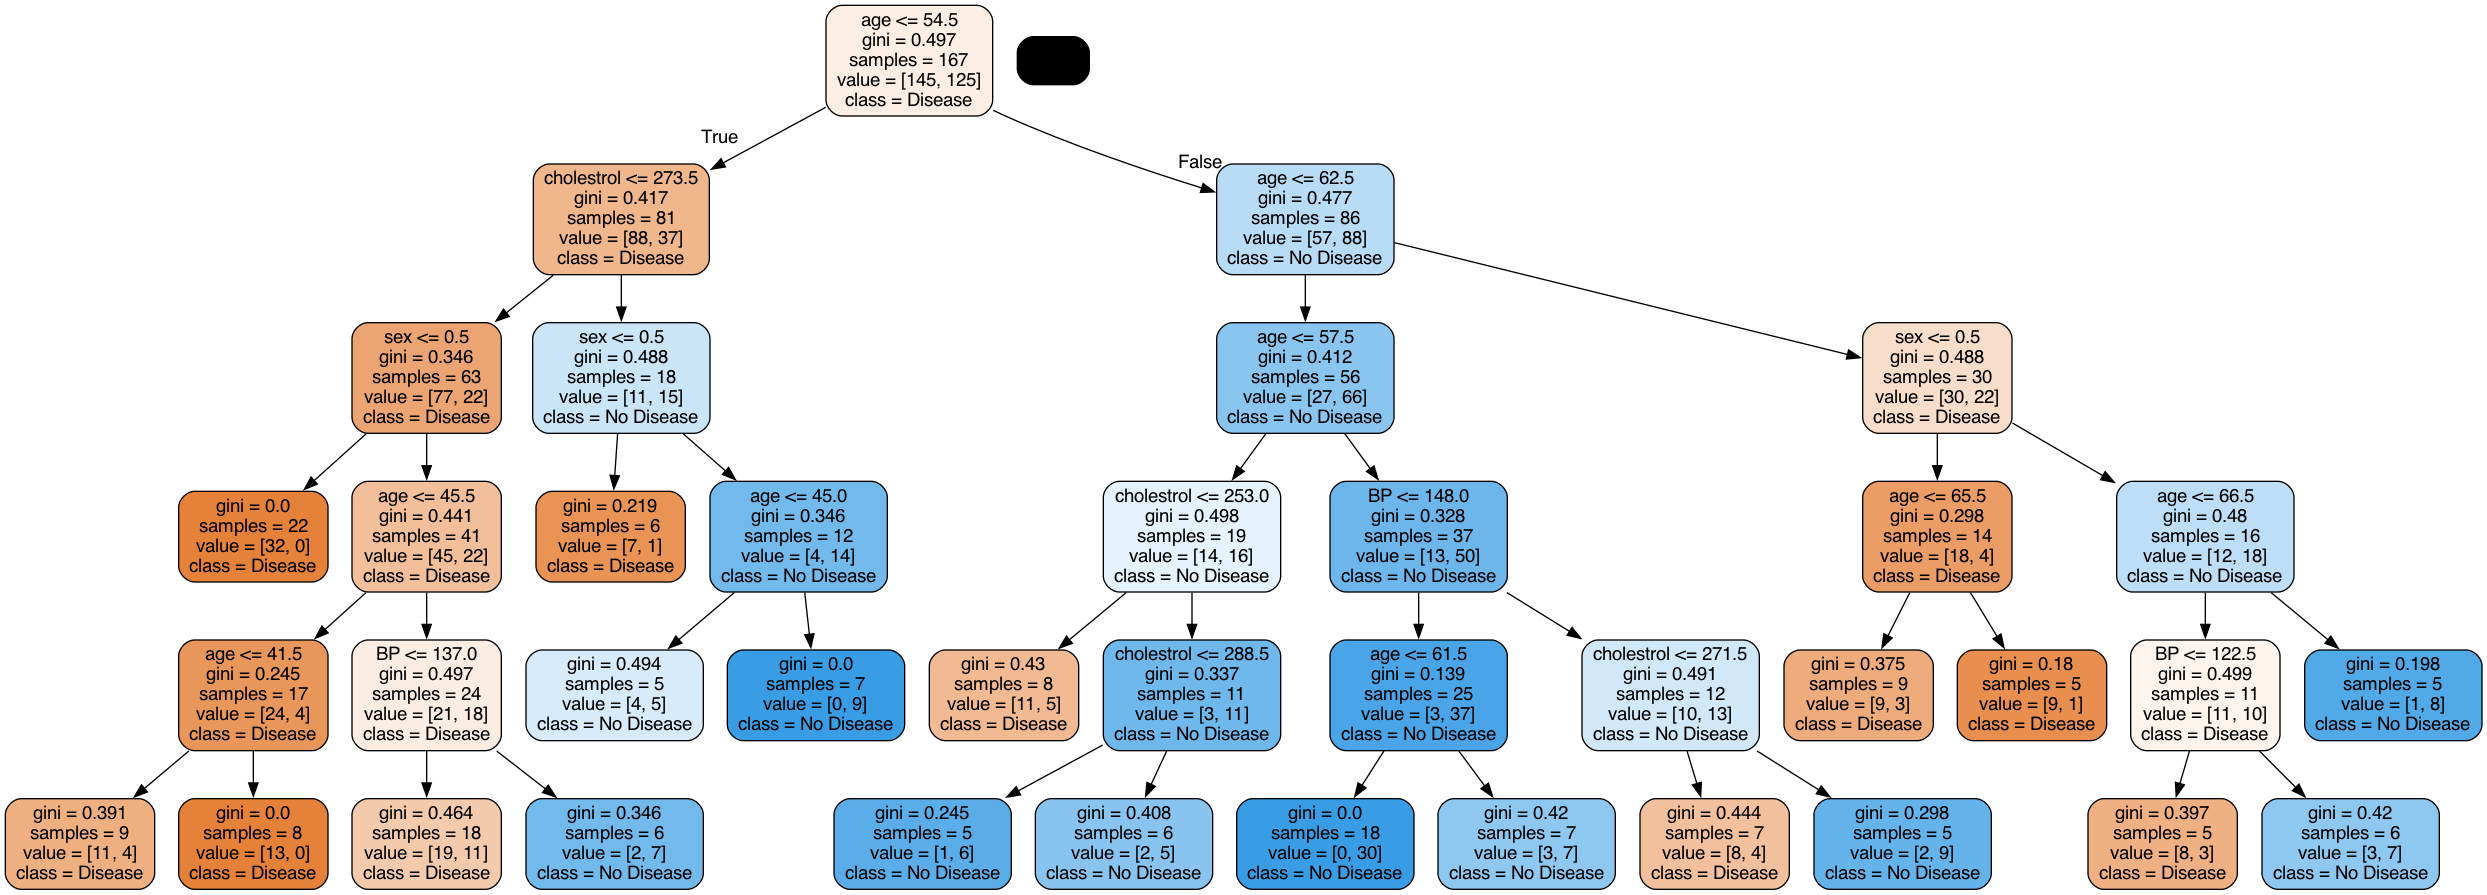

In [101]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

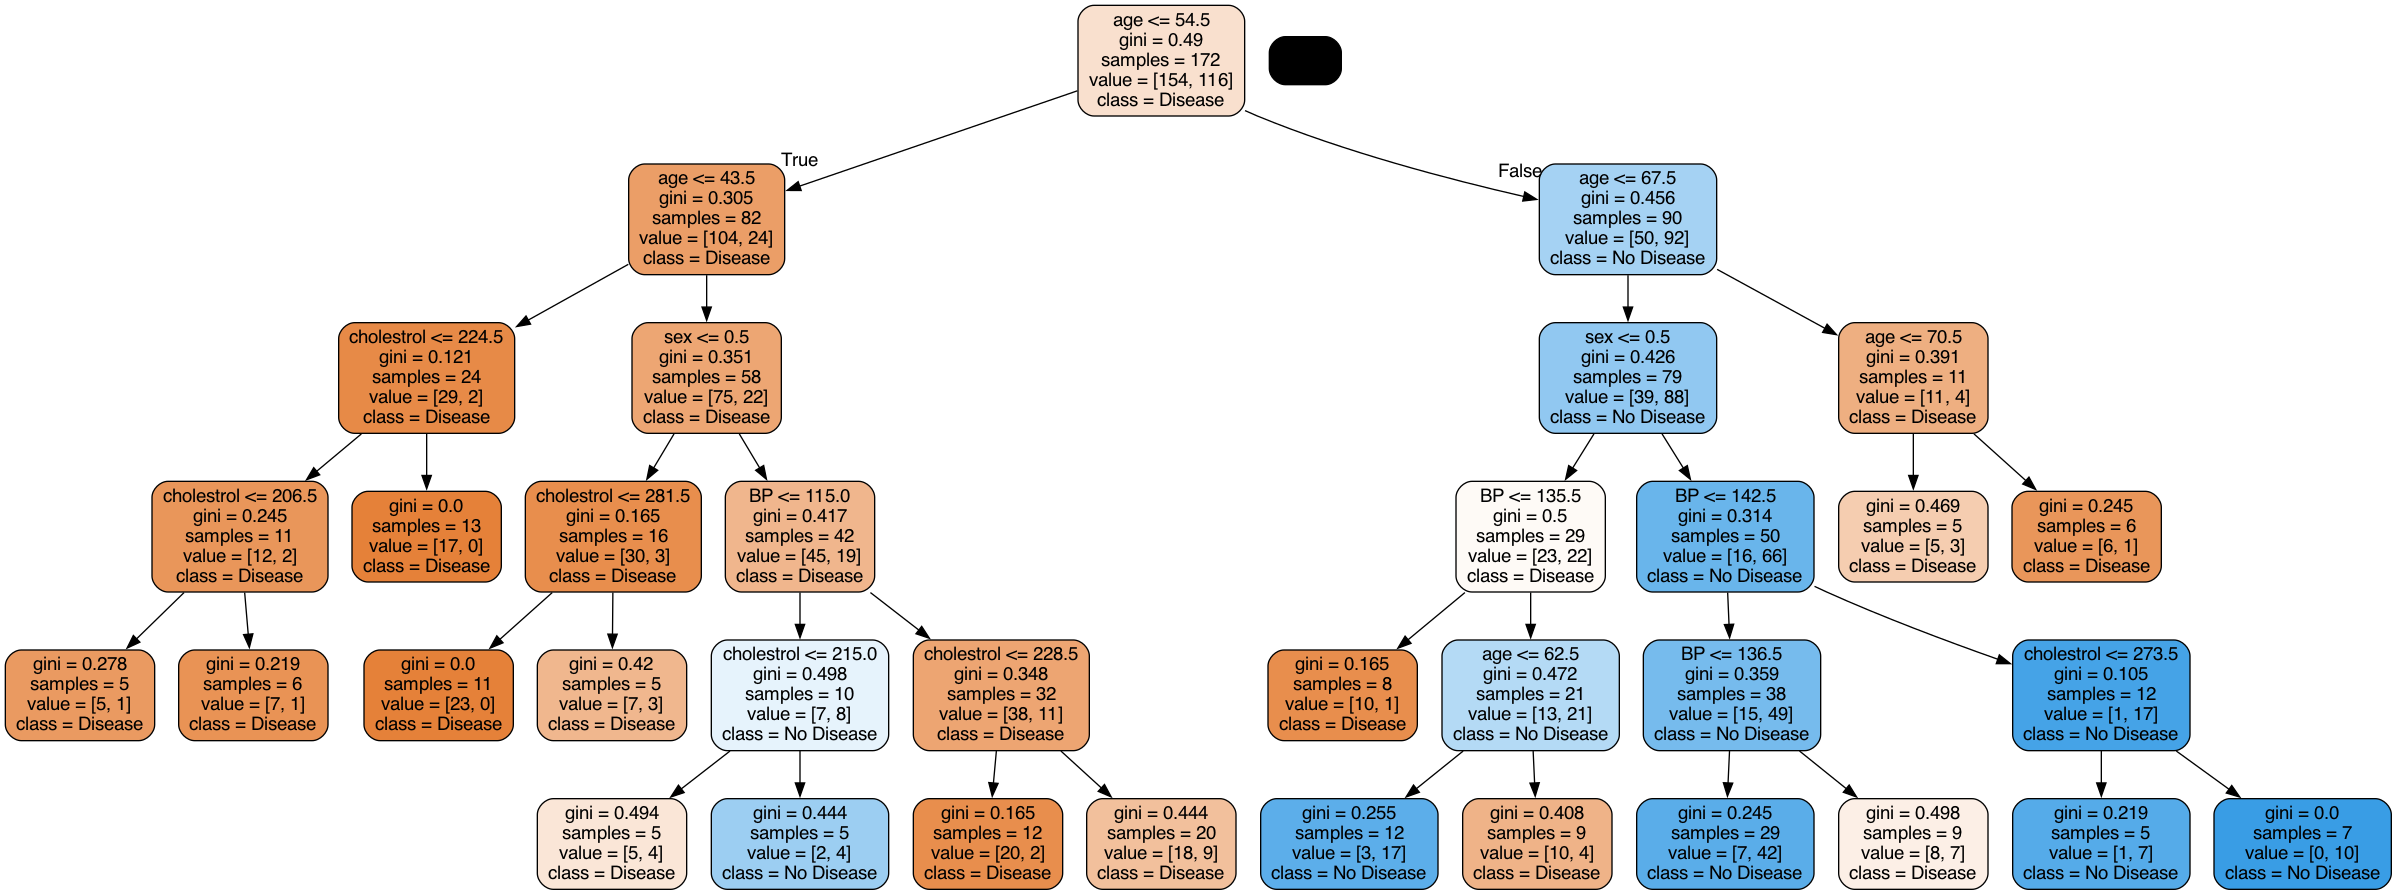

In [102]:
gph = get_dt_graph(best_rf.estimators_[12])
Image(gph.create_png())

## Feature Importance 

In [103]:
best_rf.feature_importances_

array([0.32822532, 0.19989588, 0.16786346, 0.30401534])

In [104]:
imp_feature = pd.DataFrame({
    'Var_names' : X.columns, 
    'Importance' : best_rf.feature_importances_
})

In [105]:
imp_feature.sort_values(by = 'Importance', ascending = False)

,Var_names,Importance
0,age,0.328225
3,cholestrol,0.304015
1,sex,0.199896
2,BP,0.167863


We find that variable "age" is most important in determining whether a person will have heart disease or not. 